In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from crop_weapon import crop_weapon, jpgize

all of the images need to have a constant size

pendants and attachments - I need a specific place to place them per each of the guns

skins are going to be appliable over the actual gun

pendants:
    pinata
    dice
    4_leaf
    gold_medal
    disco
    
attachments:
    thermal_scope
    acog
    flamethrower
    grenade_launcher
    green_laser
    red_laser
    holo_scope
    suppressor
    red_dot
    
skins: 
    1
    2
    3
    4
    5
    6
    7
    8
    9 

total: 5 pendants * 9 attachments * 9 skins = 405 unique combinations

all the gun have to be extracted from the png and then the attachements, skins etc added and the whole thing has to be put in the center of the png

for some attachements there are going to be additional things to put in the up-left corner

and the name of the gun is in the bottom-left corner

In [2]:
pinata_spaz = cv2.imread('./data/Spaz12/PInata KC.png', cv2.IMREAD_UNCHANGED)

In [3]:
pinata_deagle = cv2.imread('./data/Deagle/PInata KC.png', cv2.IMREAD_UNCHANGED)

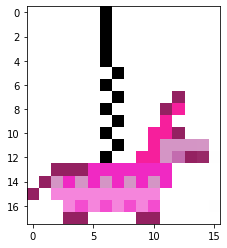

In [4]:
plt.imshow(pinata_deagle)

In [5]:
np.testing.assert_equal(pinata_spaz, pinata_deagle)

---

In [10]:
import os

In [11]:
for i in os.listdir('skins'):
    assert len(os.listdir('skins/' + i)) == 9

In [12]:
from glob import glob

In [13]:
ak_skins = [cv2.imread(i, cv2.IMREAD_UNCHANGED) 
            for i in glob('skins/Ak47/*.png')]

In [14]:
skin = ak_skins[0]

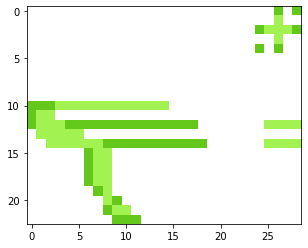

In [15]:
plt.imshow(skin)

In [16]:
skin.shape

(23, 29, 4)

In [17]:
skin[-1].shape

(29, 4)

In [77]:
def get_bottom_px(skin):
    _skin = jpgize(skin)
    white_px = [255, 255, 255]
    start_idx = None
    for idx in range(len(_skin[-1])):
        if not all(i == j for i, j in zip(_skin[-1][idx], white_px)):
            return (idx, _skin.shape[0])

In [74]:
for skin in ak_skins:
    assert get_skin_bottom_px(skin)[0] == 9

In [55]:
def overlay(skin, image):
    """
    overlays :param ndarray skin: onto :param ndarray image:
    :returns ndarray:
    """
    start_idx = get_skin_bottom_px(skin)

In [47]:
ak47 = cv2.imread('./weapons/Ak47.png', cv2.IMREAD_UNCHANGED)

In [64]:
overlay(skin, ak47)

In [184]:
# (x, y) starting points
skins_coords_dict = {
    'ak47': [22, 15]
}

In [154]:
ak47.shape

(17, 52, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


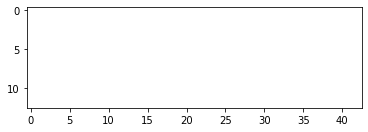

In [156]:
plt.imshow(arr)

In [ ]:
np.array(k

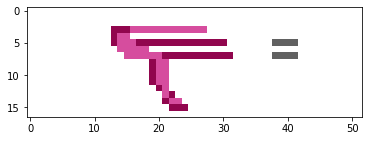

In [203]:
plt.imshow(_skin)

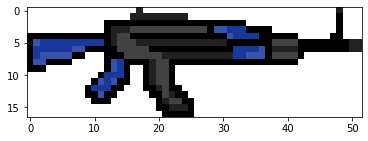

In [204]:
plt.imshow(ak47)

In [181]:
ak47[14, 23]

array([ 66,  66,  66, 255], dtype=uint8)

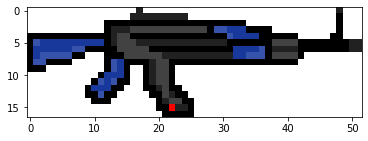

In [205]:
_ak = ak47.copy()
_ak[15, 22] = [255, 0, 0, 255]
plt.imshow(_ak)

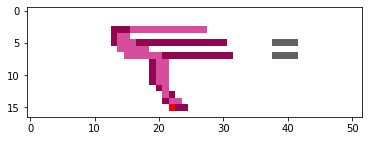

In [206]:
__skin = _skin.copy()
__skin[15, 22] = [255, 0, 0, 255]
plt.imshow(__skin)

to left add till its equal to weapon idx

then add to right till fit the shape

to bottom add until the length to -1 weapon equals skin

after that, to top add the remainder unless the skin equals,
if skin greater add to the weapon

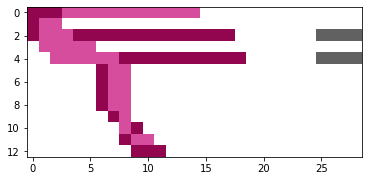

In [67]:
plt.imshow(skin)

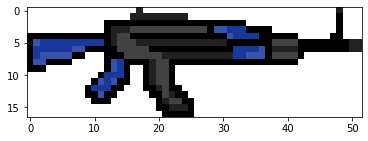

In [51]:
plt.imshow(ak47)

once the png is in the same size could just loop through the rows and cols and replace the px of ak where the px of skin is non-transparent